In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [15]:
# Load image in color
img_path = os.path.join("..", "data", "task_04", "image_04.jpg")
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

if img is None:
    raise FileNotFoundError(f"Image not found at {img_path}")

In [16]:
# Function to apply block averaging for color image
def block_average_color(image, block_size):
    h, w, c = image.shape
    out_img = image.copy()

    for i in range(0, h - h % block_size, block_size):
        for j in range(0, w - w % block_size, block_size):
            block = image[i:i + block_size, j:j + block_size]
            avg = np.mean(block.reshape(-1, c), axis=0).astype(np.uint8)
            out_img[i:i + block_size, j:j + block_size] = avg

    return out_img

In [17]:
# Apply block averaging for each block size
img_3x3 = block_average_color(img, 3)
img_5x5 = block_average_color(img, 5)
img_7x7 = block_average_color(img, 7)

In [18]:
# Convert BGR to RGB for correct display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_3x3_rgb = cv2.cvtColor(img_3x3, cv2.COLOR_BGR2RGB)
img_5x5_rgb = cv2.cvtColor(img_5x5, cv2.COLOR_BGR2RGB)
img_7x7_rgb = cv2.cvtColor(img_7x7, cv2.COLOR_BGR2RGB)

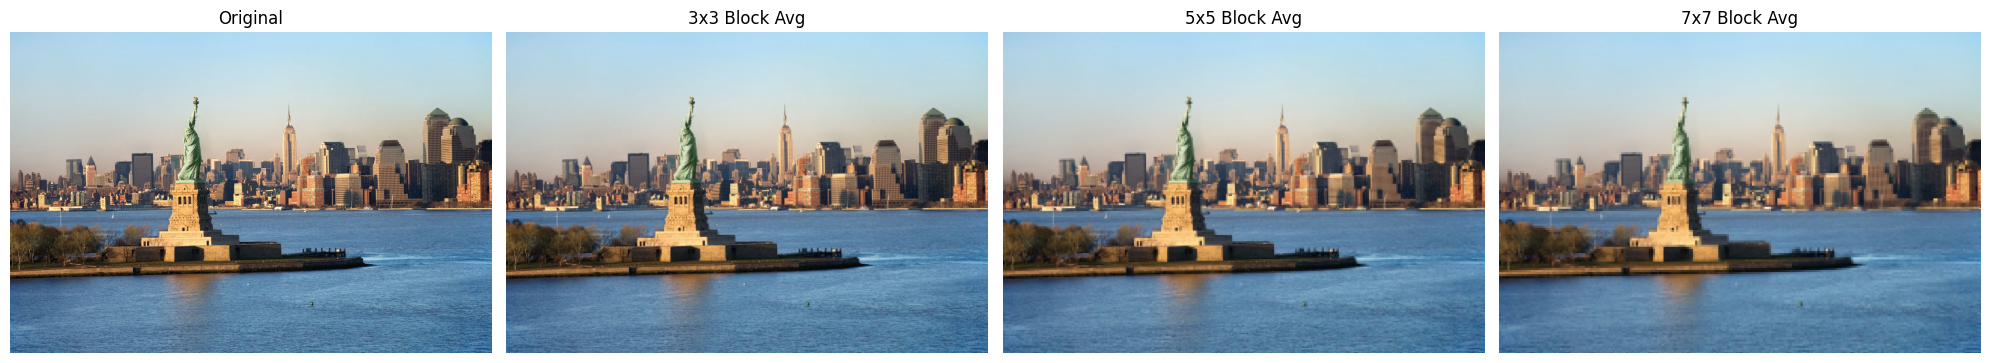

In [19]:
# Display results
titles = ['Original', '3x3 Block Avg', '5x5 Block Avg', '7x7 Block Avg']
images = [img_rgb, img_3x3_rgb, img_5x5_rgb, img_7x7_rgb]

plt.figure(figsize=(20, 5))
for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [20]:
# Save results
result_dir = os.path.join("..", "results", "task_04")
os.makedirs(result_dir, exist_ok=True)

cv2.imwrite(os.path.join(result_dir, "block_avg_3x3.jpg"), img_3x3)
cv2.imwrite(os.path.join(result_dir, "block_avg_5x5.jpg"), img_5x5)
cv2.imwrite(os.path.join(result_dir, "block_avg_7x7.jpg"), img_7x7)

True